In [29]:

import re
import string
from nltk.tokenize import word_tokenize
import nltk
from operator import itemgetter
import matplotlib.pyplot as pyplot
import numpy as np
from random import shuffle#for shuffling
from scipy.optimize import curve_fit

In [30]:
def tokenizer(l):#give the file name here
    f = open(l,'r')
    strl = f.read()
    list_of_words = word_tokenize(strl)
    return list_of_words


In [31]:
def zipfs_law_length(dict_freq):
    #lenght is proportional to the rank of the token
    #rank is invesly proportional to the frequency of occurence
    #length is inversly proportional to frequency of its occurence 
    list_key = []
    list_frequency = []
    for (key,fvalue) in reversed(sorted(dict_freq.items(), key = itemgetter(1))):
        list_key.append(key)
        list_frequency.append(fvalue)
    #rank is in revese order
    #list_key is the lis of tokens and list_frequency is the list of its occurences
    #list_key can be used to plot Zifp's law. the plot of length of word versus the frequency.

    o=np.arange(len(list_key))  
    
    pyplot.plot(o,list_frequency)
    pyplot.xlabel('Rank', fontsize=18)
    pyplot.ylabel('Frequency', fontsize=16)
    pyplot.show()

In [32]:
#def zipfs_law_meaning():


def return_type(tokens__):
    return set(tokens__)

#|V| = kN**bt
#N is the total number of tokens
#the funtion returns V, i.e types
def function (n,k,bt):
    return k*(n**bt)


In [33]:

def heap_law(tokens_): #pass the list of all the tokens
    #this law tells how the overall vocabulary(types) grows with the size of the corpus.
    #here we only pass number of tokens
    #x is the diffent number of tokens and y is the differnt number of corresponding types
    #then we use the scilearn curve_fit to get the esitmated paramters
    token_sample = [tokens_[0:i] for i in range(0,len(tokens_),900)]
    type_samples = [len(set(j)) for j in token_sample]
   
    #keeps the lenght of the list type
    x = [len(tokens_[0:i]) for i in range(0,len(tokens_),900)]
    y = type_samples
    
    pyplot.plot(x,y,label = "according to data")
    pyplot.legend()
    parameters = curve_fit(function, x, y)#paramter order - function that returns y, x, practical y
    k,bt = parameters[0]
    print ("The estimated value of k is :",k,"The estimated value of beta is:",bt)
    pyplot.plot(x,k*(x**bt), label = "fit")
    pyplot.legend()
    pyplot.xlabel('Token', fontsize=18)
    pyplot.ylabel('Types/Unique Words', fontsize=16)
    pyplot.show()

the token number is : 74945
the total types are: 8574
the lexical richness/ TTR is : 0.11440389619053973


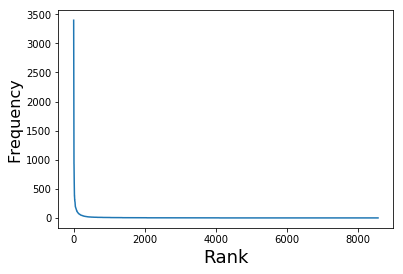

The estimated value of k is : 10.4979840454 The estimated value of beta is: 0.596233988041


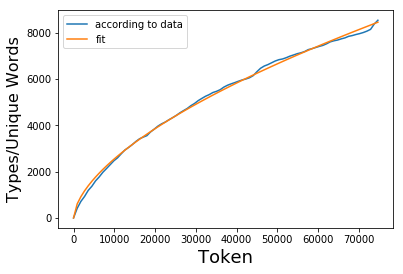

In [34]:

#total number of words present in the corpus
tokens = tokenizer('the_adventures_of_top_sawyer.txt')

#this will remove the punctuations
tokens = [x for x in tokens if not re.fullmatch('[' + string.punctuation + ']+', x)]

#number of unique words
types = set(tokens)

#find the TTR type/token reatio also known as lexical richness
TTR = len(types)/len(tokens)
#print the outputs
print ("the token number is :",len(tokens))
print ("the total types are:",len(types))
print ("the lexical richness/ TTR is :",TTR)

#plot the freq vs rank to check Zipf's law
frequency_distribution = nltk.FreqDist(tokens) #this creates a dictionary of words versus frequency

zipfs_law_length(frequency_distribution)

#heap's law
heap_law(tokens)


